In [27]:
## Genetic

In [23]:
import random
from typing import List
from DemandPrediction import DemandPrediction

class GeneticProgramming:
    population_size: int = 100
    generations: int = 100
    mutation_rate: float = 0.1
    tournament_size: int = 7

    def __init__(self, problem: DemandPrediction):
        self.problem = problem

    def gen_population(self) -> List[List[float]]:
        "Generate an initial population of random individuals."
        population = []
        for i in range(self.population_size):
            individual = []
            for j in range(DemandPrediction.N_PARAMETERS):
                individual.append(random.uniform(-100, 100))
            population.append(individual)
        return population

    def evaluate_fitness(self, individual: List[float]) -> float:
        "Evaluate the fitness of an individual."
        return self.problem.evaluate(individual)

    def tournament_selection(self, population: List[List[float]]) -> List[float]:
        "Select individuals for the next generation using tournament selection."
        tournament = random.sample(population, self.tournament_size)
        best_individual = min(tournament, key=self.evaluate_fitness)
        return best_individual

    def crossover(self, parent1: List[float], parent2: List[float]) -> List[float]:
        "Crossover two individuals to create a new offspring."
        child = []
        for i in range(DemandPrediction.N_PARAMETERS):
            if random.random() < 0.5:
                child.append(parent1[i])
            else:
                child.append(parent2[i])
        return child

    def mutate(self, individual: List[float]) -> List[float]:
        "Mutate an individual by replacing one of its parameters with a random value."
        mutated_individual = individual.copy()
        if random.random() < self.mutation_rate:
            index = random.randint(0, DemandPrediction.N_PARAMETERS - 1)
            mutated_individual[index] = random.uniform(-100, 100)
        return mutated_individual

    def run(self) -> None:
        "Run the genetic programming algorithm."
        population = self.gen_population()
        for i in range(self.generations):
            print("Generation ", i + 1)
            new_population = []
            for j in range(self.population_size):
                parent1 = self.tournament_selection(population)
                parent2 = self.tournament_selection(population)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                new_population.append(child)
            population = new_population
        best_individual = min(population, key=self.evaluate_fitness)
        print("Best individual: ", best_individual)
        print("Fitness: ", self.evaluate_fitness(best_individual))


problem = DemandPrediction("train")
gp = GeneticProgramming(problem)
gp.run()


Generation  1
Generation  2
Generation  3
Generation  4
Generation  5
Generation  6
Generation  7
Generation  8
Generation  9
Generation  10
Generation  11
Generation  12
Generation  13
Generation  14
Generation  15
Generation  16
Generation  17
Generation  18
Generation  19
Generation  20
Generation  21
Generation  22
Generation  23
Generation  24
Generation  25
Generation  26
Generation  27
Generation  28
Generation  29
Generation  30
Generation  31
Generation  32
Generation  33
Generation  34
Generation  35
Generation  36
Generation  37
Generation  38
Generation  39
Generation  40
Generation  41
Generation  42
Generation  43
Generation  44
Generation  45
Generation  46
Generation  47
Generation  48
Generation  49
Generation  50
Generation  51
Generation  52
Generation  53
Generation  54
Generation  55
Generation  56
Generation  57
Generation  58
Generation  59
Generation  60
Generation  61
Generation  62
Generation  63
Generation  64
Generation  65
Generation  66
Generation  67
Gene

In [28]:
## PSO

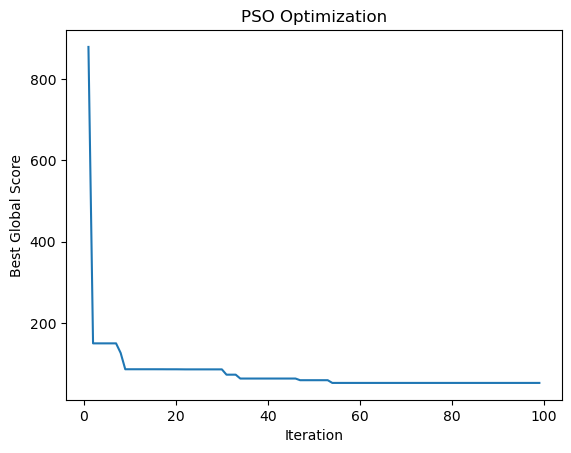

Best parameters found: [37.505738588823704, -38.80764617173516, -46.28685597329469, 97.14267847729067, -15.871870475009104, -21.152983971253576, -78.87282152015575, -11.933087035569983, 93.87297031469203, -8.866896732487191, -8.310405977190143, 77.98166140498583, -33.37611764981044, -4.3518495535913075]
Best score found: 52.04523616165854


In [24]:
import random
import numpy as np
from DemandPrediction import DemandPrediction
import matplotlib.pyplot as plt


class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_score = np.inf
        self.best_position = position
        
class PSO:
    def __init__(self, num_particles, num_iterations, dataset_name):
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.dataset_name = dataset_name
        self.bounds = DemandPrediction.bounds()
        self.particles = [Particle(self._random_position(), self._random_velocity())
                          for i in range(num_particles)]
        self.best_global_score = np.inf
        self.best_global_position = None

    def _random_position(self):
        return [random.uniform(b[0], b[1]) for b in self.bounds]

    def _random_velocity(self):
        return [random.uniform(-1, 1) for i in range(DemandPrediction.N_PARAMETERS)]

    def _update_velocity_and_position(self, particle):
        cognitive = 2.0
        social = 2.0
        for j in range(DemandPrediction.N_PARAMETERS):
            r1 = random.uniform(0, 1)
            r2 = random.uniform(0, 1)
            velocity = (cognitive * r1 * (particle.best_position[j] - particle.position[j]) +
                        social * r2 * (self.best_global_position[j] - particle.position[j]))
            particle.velocity[j] = velocity
            particle.position[j] += velocity

    def run(self):
        scores = []
        for i in range(self.num_iterations):
            scores.append(self.best_global_score)
            for particle in self.particles:
                if not DemandPrediction.is_valid(particle.position):
                    particle.position = self._random_position()
                if not DemandPrediction.is_valid(particle.velocity):
                    particle.velocity = self._random_velocity()

                score = DemandPrediction(self.dataset_name).evaluate(particle.position)
                if score < particle.best_score:
                    particle.best_position = particle.position
                    particle.best_score = score

                if score < self.best_global_score:
                    self.best_global_position = particle.position
                    self.best_global_score = score

                self._update_velocity_and_position(particle)

        plt.plot(scores)
        plt.title('PSO Optimization')
        plt.xlabel('Iteration')
        plt.ylabel('Best Global Score')
        plt.show()

        return self.best_global_position, self.best_global_score


if __name__ == '__main__':
    pso = PSO(num_particles=50, num_iterations=100, dataset_name="train")
    best_params, best_score = pso.run()
    print("Best parameters found:", best_params)
    print("Best score found:", best_score)